# Proyecto 2: Propedéutico
Alumno: Jorge III Altamirano Astorga

## Parte 1: Teoría de Álgebra Lineal y Optimización

*Necesito estudiar esta parte*

## Parte 2: Aplicaciones en Python

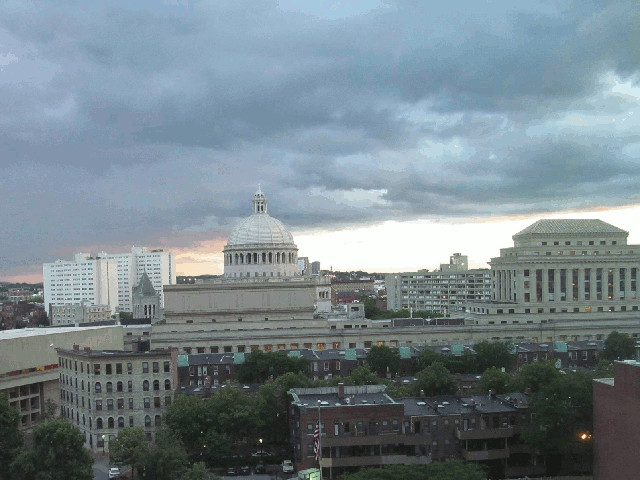

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot #import matplotlib.pyplot as plt

img = Image.open("tarea2.color.png")
img

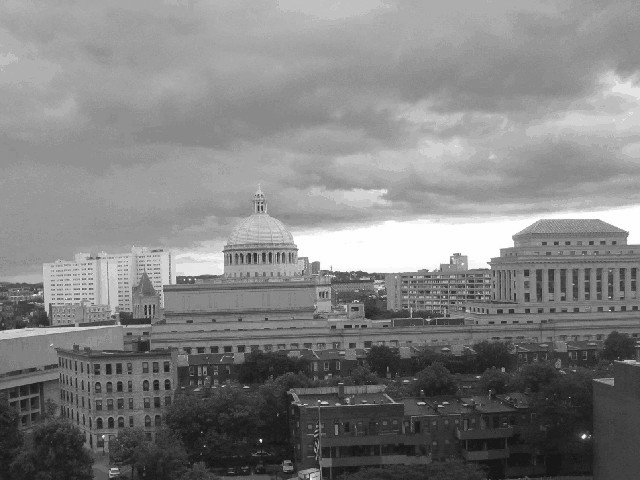

In [2]:
img = img.convert("LA")
row, col =  img.size
data = np.zeros((row*col, 5))
matplotlib.pyplot.figure(figsize=(9, 6))
matplotlib.pyplot.imshow(img)
img

### 1. SVD

In [3]:
A = np.matrix(img.getdata(band=0), float)
A

matrix([[ 171.,  180.,  176., ...,   64.,   65.,   63.]])

In [4]:
A.shape = (img.size[1], img.size[0])
A.size

307200

In [5]:
u, s, v = np.linalg.svd(A, full_matrices=1)

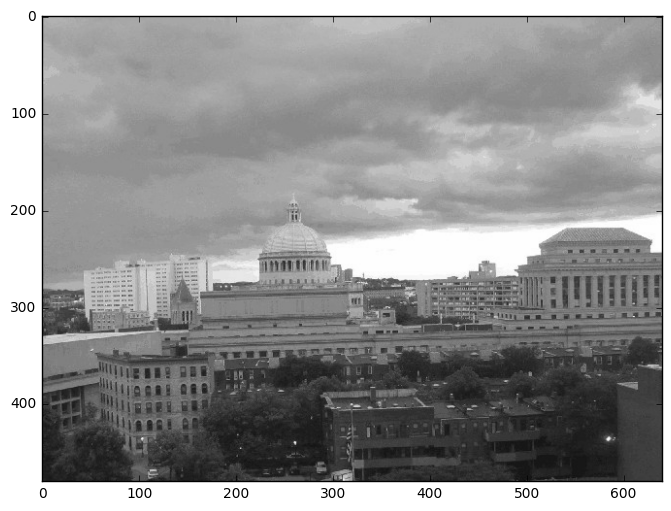

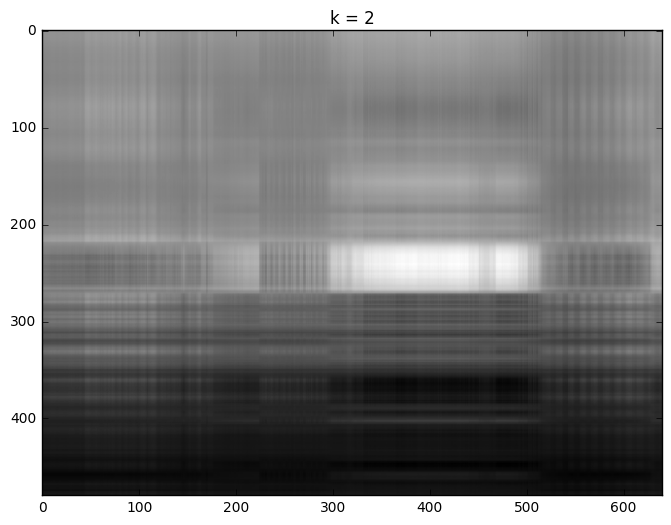

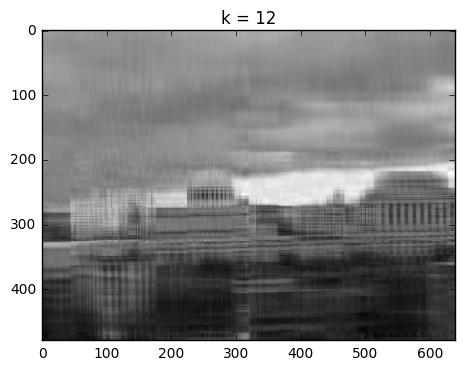

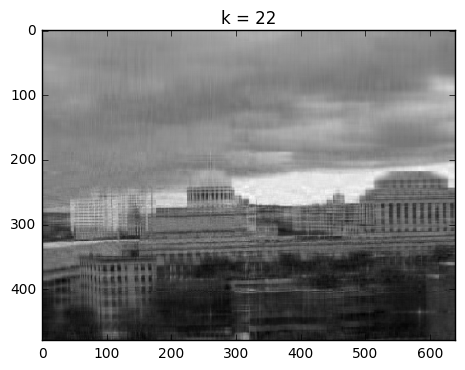

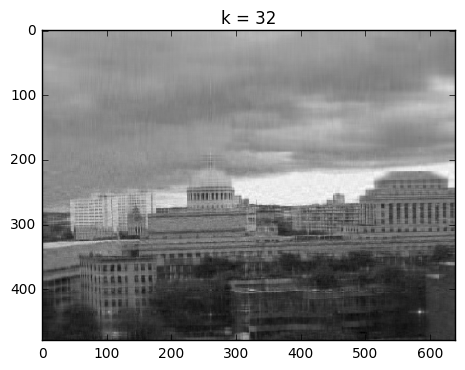

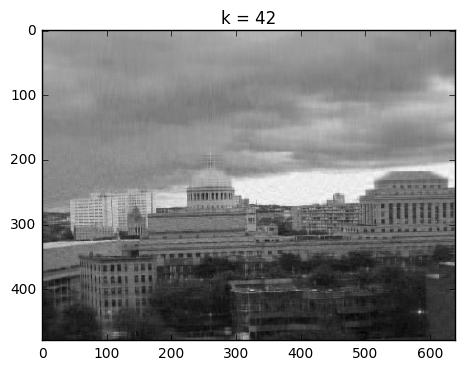

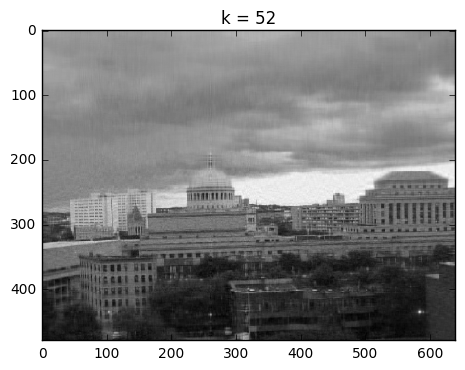

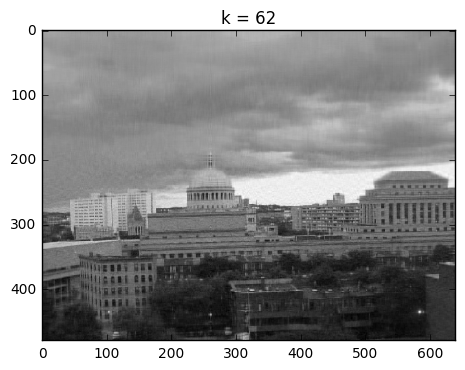

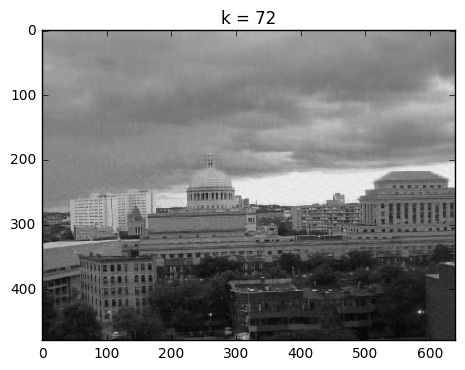

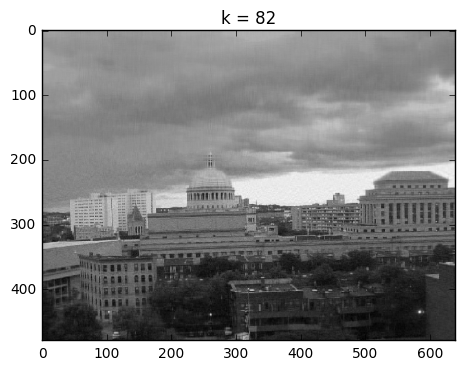

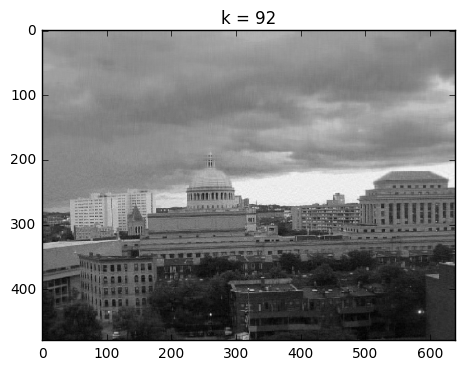

In [6]:
matplotlib.pyplot.figure(figsize=(9,6))
matplotlib.pyplot.imshow(img, cmap='gray')
for k in range(2,100,10):
    B = np.matrix(u[:, :k]) * np.diag(s[:k]) * np.matrix(v[:k, :])
    matplotlib.pyplot.imshow(B, cmap='gray')
    matplotlib.pyplot.title("k = " + str(k))
    matplotlib.pyplot.show()

#### ¿Qué tiene que ver con la compresión de imágenes? 
Como se puede observar, muchos algoritmos utilizan la compresión a través de la operación SVD, pues reduce el número de columnas, renglones en una matriz y va reduciéndose de manera progresiva el número de renglones y en consecuencia del tamaño de archivos, por ende perdiendo calidad.

### a. Pseudoinversa

In [7]:
import numpy as np

def pinversa(A):
    u, s, v = np.linalg.svd(A)
    B = np.dot(v.transpose(), np.dot(np.diag(s**-1), u.transpose()))
    B = v.transpose() * (np.diag(s**-1)*u.transpose())
    return np.array(B)

A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
C = np.matrix([[1,2],[4,5]])
C = pinversa(C)
C

array([[-1.66666667,  0.66666667],
       [ 1.33333333, -0.33333333]])

Se muestra como al aplicar la inversa nuevamente vuelve a su forma original

In [8]:
np.linalg.pinv(C)

array([[ 1.,  2.],
       [ 4.,  5.]])

### 3. Pandas

In [15]:
import pandas as pd
import os
import numpy as np
import statsmodels.formula.api as sm

studysat = pd.read_csv("study_vs_sat.csv")
studysat = pd.DataFrame(studysat)
studysat

,study_hours,sat_score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410
5,7,530
6,12,600
7,22,790
8,1,350
9,3,400


In [28]:
modelo = sm.ols("study_hours ~ sat_score", studysat)
modelo = modelo.fit()
modelo.params

Intercept   -10.941095
sat_score     0.034415
dtype: float64

In [35]:
sumhours = sum(studysat["study_hours"])
sumsat = sum(studysat["sat_score"])
sumhourssat = sum(studysat["study_hours"] * studysat["sat_score"])
sumhours2 = sum(studysat["study_hours"]**2)
sumsat2 = sum(studysat["sat_score"]**2)
length = len(studysat["study_hours"])
β = (length * sumhourssat - sumhours*sumsat)/(length * sumhours2 - sumhours**2)
β


25.326467777895743

In [36]:
α = sumsat / length - (β*sumhours) / length
α

353.16487949888523